In [31]:
from LinearRegression import LinearRegression
from sklearn.linear_model import SGDRegressor
import numpy as np
from time import time
import matplotlib.pyplot as plt
plt.style.use('seaborn')


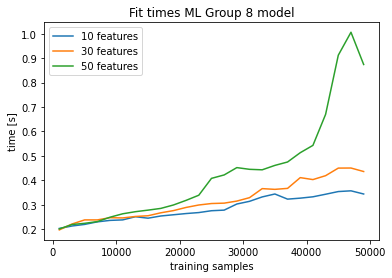

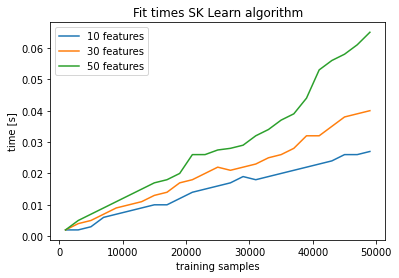

In [40]:
alpha = 0.001
max_iter = 1000
rng = np.random.RandomState(0)
noise = 0.15


def benchmarkFit(model, m_samples, n_features):
    X = rng.rand(m_samples, n_features)       
    w = rng.rand(n_features)
    c = 2
    y = np.dot(X, w) + c

    start_time = time()
    model.fit(X, y)
    end_time = time()
    fit_time = end_time - start_time

    return fit_time


def createFitChart(model, title, fileName):
    sample_list = [i*1000 for i in range(1,50,2)]
    feature_list = [10, 30, 50]

    for n_features in feature_list:
        plt.plot(sample_list, [benchmarkFit(model, m_samples, n_features) for m_samples in sample_list], label=f"{n_features} features")

    plt.title(title)
    plt.xlabel("training samples")
    plt.ylabel("time [s]")
    plt.legend()
    plt.savefig(fileName)
    plt.show()


ML_2020_model = LinearRegression(alpha=alpha, max_iter=max_iter)
sk_learn_model = SGDRegressor(alpha=alpha, max_iter=max_iter)

createChart(ML_2020_model, title="Fit times ML Group 8 model", fileName="out/performance_ml2020")
createChart(sk_learn_model, title="Fit times SK Learn algorithm", fileName="out/performance_skLearn")